In [1]:
import numpy as np
import cv2

import matplotlib.pyplot as plt
# display plots in this notebook
%matplotlib inline

In [2]:
def detect(frame):
    height, width, depth = frame.shape

    # create grayscale version
    grayscale = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
 
    # equalize histogram
    cv2.equalizeHist(grayscale, grayscale)

    # detect objects
    classifier = cv2.CascadeClassifier("/usr/local/share/OpenCV/haarcascades/haarcascade_frontalface_alt.xml")
    DOWNSCALE = 4
    minisize = (frame.shape[1]/DOWNSCALE,frame.shape[0]/DOWNSCALE)
    miniframe = cv2.resize(frame, minisize)
    faces = classifier.detectMultiScale(miniframe)
    if len(faces)>0:
        # print 'face detected!'
        for i in faces:
            x, y, w, h = [ v*DOWNSCALE for v in i ]
            cv2.rectangle(frame, (x,y), (x+w,y+h), (0,255,0))
    return frame

In [4]:
cap = cv2.VideoCapture(0)

if (cap==True):
    print("deu certo")
while(True):
    # Capture frame-by-frame
    ret, frame = cap.read()
    img = frame.copy()
    # Call the function
    frame = detect(frame)

    # Display the resulting frame
    cv2.imshow('frame',frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()
cap = cv2

(-0.5, 639.5, 479.5, -0.5)

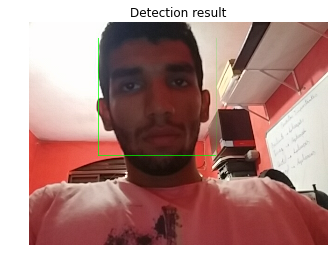

In [5]:
plt.imshow(frame[:,:,::-1])
plt.title('Detection result')
plt.axis('off')

(-0.5, 639.5, 479.5, -0.5)

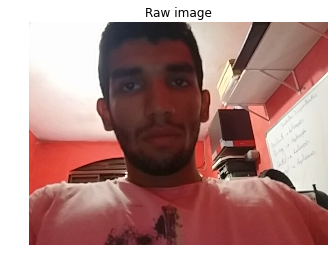

In [6]:
img = img[:,:,::-1] # Converting from BGR (OpenCV) to RGB (standard)
plt.imshow(img)
plt.title('Raw image')
plt.axis('off')

In [7]:
img.mean()

121.60050998263888

In [8]:
img.std()

77.893883044825259

In [9]:
hist = np.histogram(img)
for l in hist: 
    print l

[ 47136 157943 185931  69896  48264  93652  56804  43677  89031 129266]
[   0.    25.5   51.    76.5  102.   127.5  153.   178.5  204.   229.5
  255. ]


<Container object of 10 artists>

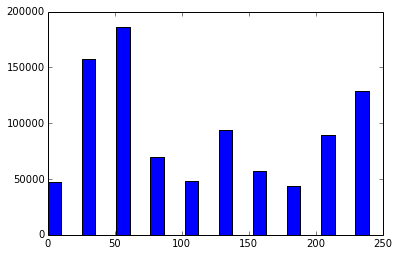

In [10]:
plt.bar(hist[1][:-1], hist[0], 10) # counts, x-axis

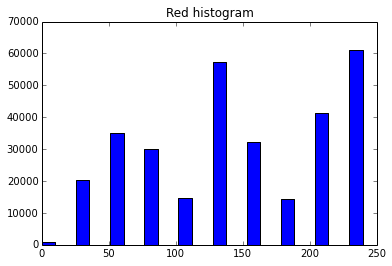

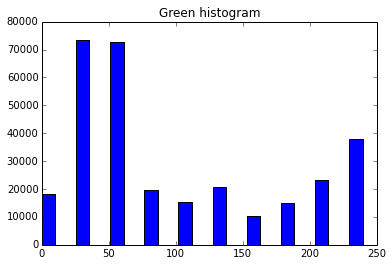

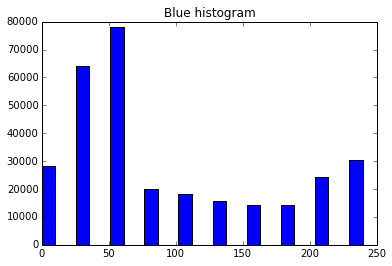

In [11]:
hist_red  = np.histogram(img[:,:,0], hist[1]) # using the same x-axis as the general histogram (hist[1])
hist_green  = np.histogram(img[:,:,1], hist[1])
hist_blue  = np.histogram(img[:,:,2], hist[1])

plt.figure()
plt.bar(hist[1][:-1], hist_red[0], 10)
plt.title('Red histogram')
plt.figure()
plt.bar(hist[1][:-1], hist_green[0], 10)
plt.title('Green histogram')
plt.figure()
plt.bar(hist[1][:-1], hist_blue[0], 10)
plt.title('Blue histogram')

In [12]:
np.hstack((hist_red[0],hist_blue[0],hist_green[0]))

array([  795, 20264, 34958, 30057, 14754, 57306, 32167, 14508, 41274,
       61117, 28151, 64155, 78109, 20105, 18047, 15654, 14202, 14200,
       24357, 30220, 18190, 73524, 72864, 19734, 15463, 20692, 10435,
       14969, 23400, 37929])

In [13]:
640*480*3

921600

In [14]:
hist_red

(array([  795, 20264, 34958, 30057, 14754, 57306, 32167, 14508, 41274, 61117]),
 array([   0. ,   25.5,   51. ,   76.5,  102. ,  127.5,  153. ,  178.5,
         204. ,  229.5,  255. ]))

In [15]:
hist

(array([ 47136, 157943, 185931,  69896,  48264,  93652,  56804,  43677,
         89031, 129266]),
 array([   0. ,   25.5,   51. ,   76.5,  102. ,  127.5,  153. ,  178.5,
         204. ,  229.5,  255. ]))